REQUIREMENTS

1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

MY THEME: Ramen data analytics

DESCRIPTION OF THE DATASET

This dataset was originally published by "The Ramen Rater", and released on Kaggle. The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. It contains a review id, brand, variety(the product name), style(cup, bowl, or tray?), country, and stars. Stars indicate the ramen quality assessed by the reviewer on 5 point scale.
I chose this dataset because I am interested in food (especially in Japanese food) and want to see people's preferences in Japanese food.

ANALYTIC QUESTIONS
 #1 Which country produces ramen the most? And which countries makes highly rated ramens?
 #2 How stars distributed by countries, styles and brands?
 #3 What are the most popular flavor? (*need to categorize based on the ramen package labels)

****************************************************************************************************************************************
#1 Which country produces ramen the most? And which countries makes highly rated ramens?

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ramens = pd.read_csv('ramen-ratings.csv')

ramens.info()

# Need to integrate "United States" & "USA"

# 1. find ramen produced in "United States"
# 2. update ramen's country to "USA"
# 3. create new dictionaly??

ramens["Country"].replace("United States", "USA", inplace=True)
        
ramens.Country.value_counts().plot(kind="bar")
plt.ylabel("Ramen Brands Count")

ModuleNotFoundError: No module named 'seaborn'

There are clear reasons for the top 3 countries. Understandably, Japan makes ramens the most because ramen is originally from Japan. Also, the number of USA ramens is the second biggest since this dataset is made in the USA. Regarding South Korea, they have a similar culture like Japan, and they make many ramens because ramen is also popular in South Korea.

Text(0, 0.5, 'Highly Rated Brands Count')

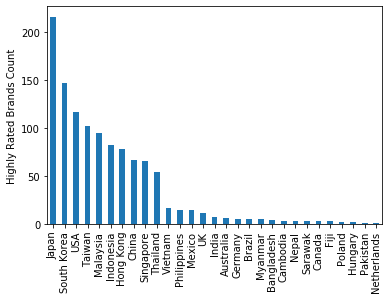

In [148]:
high_rated = ramens[ramens["Stars"] >= "4"]

high_rated.Country.value_counts().plot(kind="bar")
plt.ylabel("Highly Rated Brands Count")

When we see the top 3 countries, it is natural that Japan has highly rated ramens the most because they produce ramens the most as well. However, the ranking of South Korea and the USA is flipped compared to the number of ramens. Also, the difference between Japan and other countries got bigger. Let's see the ratio of highly rated ramens for each country to investigate the reason for the above.

In [149]:
japanese_ramen = ramens[(ramens["Country"] >= "Japan")]
korean_ramen = ramens[ramens["Country"] >= "South Korea"]
us_ramen = ramens[ramens["Country"] >= "USA"]

high_rated_japanese_ramen = ramens[(ramens["Country"] >= "Japan")& (ramens["Stars"] >= '4')]
high_rated_korean_ramen = ramens[(ramens["Country"] >= "South Korea")& (ramens["Stars"] >= '4')]
high_rated_us_ramen = ramens[(ramens["Country"] >= "USA")& (ramens["Stars"] >= '4')]

japanese_high_ratio=len(high_rated_japanese_ramen)/len(japanese_ramen)*100
korean_high_ratio=len(high_rated_korean_ramen)/len(korean_ramen)*100
us_high_ratio=len(high_rated_us_ramen)/len(us_ramen)*100

print("Japan: ", japanese_high_ratio)
print("South Korea: ", korean_high_ratio)
print("USA: ", us_high_ratio)


# How can I plot this??? I want to show them in stacked bar chart.


Japan:  43.803743045017704
South Korea:  36.40065146579804
USA:  30.787037037037035


About 44% of Japanese ramens get a high score, on the other hand, Korean ramens has 36%, and the USA's ramens have 31%. That is the reason for the change in the chart.
************************************

#2 Stars distribution by countries, styles and brands.

In [150]:
top3countries_list = ramens["Country"].value_counts()[:3].index
data_top3countries = ramens[ramens['Country'].isin(top3countries_list)]

# plt.boxplot(data_top3countries)
sns.boxplot(y='Stars', x='Country', 
                 data=data_top3countries, 
                 width=0.5,
                 palette="colorblind")

df= pd.DataFrame(data_top3countries)
df.boxplot(by=["Country"], column=["Stars"])
    

NameError: name 'sns' is not defined

#3 What are the most popular flavor? (*need to categorize based on the ramen package labels)

In [14]:
# Create category (shoyu, miso, shio, tom yam, kimuchi, etc..)
# Create dictionaly with array({shoyu:[], miso:[], tom_yam:[], kimuchi:[]})
# Iterate through database and see title of the ramen
# If the title contains some of the created category, append the ramen to the appropriate array
# count each category and show in bar chart?

